In [88]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

#cross validation
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.tree import plot_tree

# XGBoost

from xgboost import XGBClassifier
from xgboost import plot_tree

from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pandas_profiling

In [2]:
# importing the data from csv file produced after cleaning up the data in task 1
credit_one_clean_data = pd.read_csv('~/data_science_course/course_2/credit_one_v2.csv', header = 0)

In [3]:
credit_one_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [4]:
credit_one_w_dummies = pd.get_dummies(credit_one_clean_data)

In [5]:
credit_one_w_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      30000 non-null  float64
 1   LIMIT_BAL                               30000 non-null  int64  
 2   MARRIAGE                                30000 non-null  int64  
 3   AGE                                     30000 non-null  int64  
 4   PAY_0                                   30000 non-null  int64  
 5   PAY_2                                   30000 non-null  int64  
 6   PAY_3                                   30000 non-null  int64  
 7   PAY_4                                   30000 non-null  int64  
 8   PAY_5                                   30000 non-null  int64  
 9   PAY_6                                   30000 non-null  int64  
 10  BILL_AMT1                               30000 non-null  in

### Modeling with data with dummies

In [6]:
#features
X = credit_one_w_dummies.iloc[:,2:29]

In [7]:
X.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [8]:
#dependent variable
y = credit_one_w_dummies['LIMIT_BAL']

In [9]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [10]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [11]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [12]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.465205958493313
Linear Regression 0.3601546886777862
Support Vector Regression -0.04230351868449008


In [13]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [14]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.474
RMSE: 93227.988


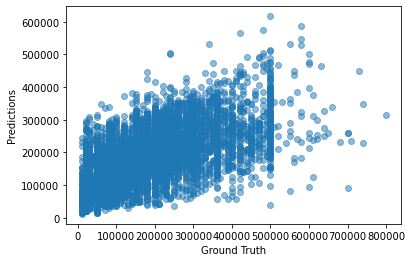

In [15]:
#color = ['blue','green']
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Model with re-encoded features (not dummies)

In [16]:
credit_one_data_transformed = credit_one_clean_data
le = preprocessing.LabelEncoder()

In [17]:
credit_one_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [18]:
#credit_one_data_transformed.drop('SEX_V2', axis=1)
credit_one_data_transformed['SEX_TRANSFORMED'] = le.fit_transform(credit_one_data_transformed['SEX'])
credit_one_data_transformed['EDUCATION_TRANSFORMED'] = le.fit_transform(credit_one_data_transformed['EDUCATION'])
credit_one_data_transformed['DEFAULT_TRANSFORMED'] = le.fit_transform(credit_one_data_transformed['default payment next month'])

In [19]:
credit_one_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [21]:
#features
X = credit_one_data_transformed.iloc[:,np.r_[4:24,25,26,27]]

#dependent variable
y = credit_one_data_transformed['LIMIT_BAL']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [22]:
X.head()

,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_TRANSFORMED,EDUCATION_TRANSFORMED,DEFAULT_TRANSFORMED
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,689,0,0,0,0,0,3,0
1,2,26,-1,2,0,0,0,2,2682,1725,...,3261,0,1000,1000,1000,0,2000,0,3,0
2,2,34,0,0,0,0,0,0,29239,14027,...,15549,1518,1500,1000,1000,1000,5000,0,3,1
3,1,37,0,0,0,0,0,0,46990,48233,...,29547,2000,2019,1200,1100,1069,1000,0,3,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,19131,2000,36681,10000,9000,689,679,1,3,1


In [23]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [24]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46272263990059576
Linear Regression 0.33544922380366354
Support Vector Regression -0.042295112760133126


In [25]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [26]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.470
RMSE: 93623.675


## Modeling doesn't have much difference when using dummies or label encoder. Going with label encoder.

In [27]:
# Correlation Matrix

corrMat = credit_one_data_transformed.corr()
print(corrMat)

                             ID  LIMIT_BAL  MARRIAGE       AGE     PAY_0  \
ID                     1.000000   0.026179 -0.029079  0.018678 -0.030575   
LIMIT_BAL              0.026179   1.000000 -0.108139  0.144713 -0.271214   
MARRIAGE              -0.029079  -0.108139  1.000000 -0.414170  0.019917   
AGE                    0.018678   0.144713 -0.414170  1.000000 -0.039447   
PAY_0                 -0.030575  -0.271214  0.019917 -0.039447  1.000000   
PAY_2                 -0.011215  -0.296382  0.024199 -0.050148  0.672164   
PAY_3                 -0.018494  -0.286123  0.032688 -0.053048  0.574245   
PAY_4                 -0.002735  -0.267460  0.033122 -0.049722  0.538841   
PAY_5                 -0.022199  -0.249411  0.035629 -0.053826  0.509426   
PAY_6                 -0.020270  -0.235195  0.034345 -0.048773  0.474553   
BILL_AMT1              0.019389   0.285430 -0.023472  0.056239  0.187068   
BILL_AMT2              0.017982   0.278314 -0.021602  0.054283  0.189859   
BILL_AMT3   

In [28]:
# Discretized Age
credit_one_data_transformed['AGE_DISC'] = pd.cut(credit_one_data_transformed['AGE'], bins=[17,24,34,44,54,64,84], labels=False)

In [29]:
corrMat = credit_one_data_transformed.corr()
print(corrMat)

                             ID  LIMIT_BAL  MARRIAGE       AGE     PAY_0  \
ID                     1.000000   0.026179 -0.029079  0.018678 -0.030575   
LIMIT_BAL              0.026179   1.000000 -0.108139  0.144713 -0.271214   
MARRIAGE              -0.029079  -0.108139  1.000000 -0.414170  0.019917   
AGE                    0.018678   0.144713 -0.414170  1.000000 -0.039447   
PAY_0                 -0.030575  -0.271214  0.019917 -0.039447  1.000000   
PAY_2                 -0.011215  -0.296382  0.024199 -0.050148  0.672164   
PAY_3                 -0.018494  -0.286123  0.032688 -0.053048  0.574245   
PAY_4                 -0.002735  -0.267460  0.033122 -0.049722  0.538841   
PAY_5                 -0.022199  -0.249411  0.035629 -0.053826  0.509426   
PAY_6                 -0.020270  -0.235195  0.034345 -0.048773  0.474553   
BILL_AMT1              0.019389   0.285430 -0.023472  0.056239  0.187068   
BILL_AMT2              0.017982   0.278314 -0.021602  0.054283  0.189859   
BILL_AMT3   

### Sex has the least correlation (among demos) with limit balance; removing it from modeling

In [47]:
credit_one_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [48]:
#features
X = credit_one_data_transformed.iloc[:,np.r_[4:24,26,27]]

#dependent variable
y = credit_one_data_transformed['LIMIT_BAL']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [49]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [50]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.469
RMSE: 93640.792


### Checking the model with marriage and age removed (since they are the next having the least correlation with limit balance

In [56]:
#features
X = credit_one_data_transformed.iloc[:,np.r_[6:24,26,27]]

#dependent variable
y = credit_one_data_transformed['LIMIT_BAL']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [57]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [58]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.425
RMSE: 97446.106


### Trying to model just using the demo information

In [59]:
#features
X = credit_one_data_transformed.iloc[:,np.r_[4,5,25,26,27]]

#dependent variable
y = credit_one_data_transformed['LIMIT_BAL']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [60]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [61]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.175
RMSE: 116726.201


In [62]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [63]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.15712404319397769
Linear Regression 0.08618394216747964
Support Vector Regression -0.04538627060481456


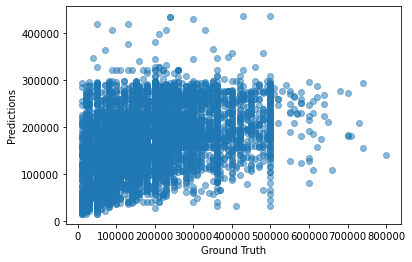

In [64]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## We are not getting any models that can help with predicting limit balance with a low erros rate. Trying to see if we can predict whether someone will default or not.

In [65]:
credit_one_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [66]:
#features
X = credit_one_data_transformed.iloc[:,np.r_[1,4:24,25,26]]

#dependent variable
y = credit_one_data_transformed['DEFAULT_TRANSFORMED']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [83]:
credit_one_data_transformed.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_TRANSFORMED,EDUCATION_TRANSFORMED,DEFAULT_TRANSFORMED,AGE_DISC
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,689,0,0,0,0,default,0,3,0,0
1,2.0,120000,female,university,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,default,0,3,0,1
2,3.0,90000,female,university,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,not default,0,3,1,1
3,4.0,50000,female,university,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,not default,0,3,1,2
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,not default,1,3,1,4


In [67]:
X.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_TRANSFORMED,EDUCATION_TRANSFORMED
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,0,3
1,120000,2,26,-1,2,0,0,0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,0,3
2,90000,2,34,0,0,0,0,0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,0,3
3,50000,1,37,0,0,0,0,0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,0,3
4,50000,1,57,-1,0,-1,0,0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,1,3


In [68]:
algos_Class_DT = []
algos_Class_DT.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class_DT.append(('Gradient Boost Classifier', GradientBoostingClassifier()))
algos_Class_DT.append(('Decision Tree Classifier', DecisionTreeClassifier()))

#classification
results_DT = []
names_DT = []
for name, model in algos_Class_DT:
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    names_DT.append(name)
    results_DT.append(result)

In [69]:
# Results
for i in range(len(names_DT)):
    print(names_DT[i],results_DT[i].mean())

Random Forest Classifier 0.8142666666666667
Gradient Boost Classifier 0.8201777777777778
Decision Tree Classifier 0.7257333333333333


In [70]:
#Modeling (Classification)
GBC = GradientBoostingClassifier(max_depth = 5)
gbc_model = GBC.fit(X_train,y_train)

#Predictions
preds_gbc = gbc_model.predict(X_test)

print(classification_report(y_test, preds_gbc))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1627
           1       0.85      0.94      0.89      5873

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500



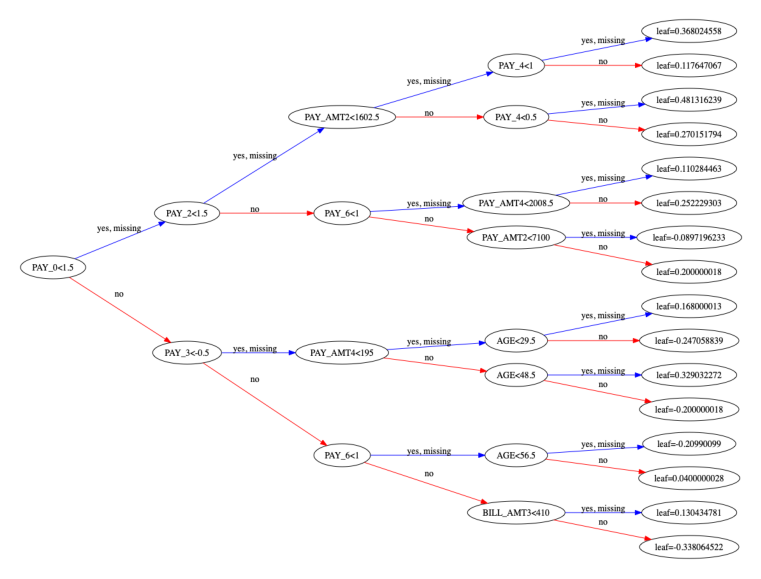

In [71]:
# Plotting tree from XGBoost
XGBC = XGBClassifier(max_depth=4)
xgbc_model = XGBC.fit(X_train, y_train)
preds = xgbc_model.predict(X_test)

fig = plt.figure(dpi=180)
ax = plt.subplot(1,1,1)
plot_tree(xgbc_model, num_trees=0, ax=ax, rankdir='LR')

### Decision Tree for visualization

In [77]:
#Modeling (Classification)
DTC = DecisionTreeClassifier(max_depth = 3)
dtc_model = DTC.fit(X_train,y_train)

#Predictions
preds = dtc_model.predict(X_test)

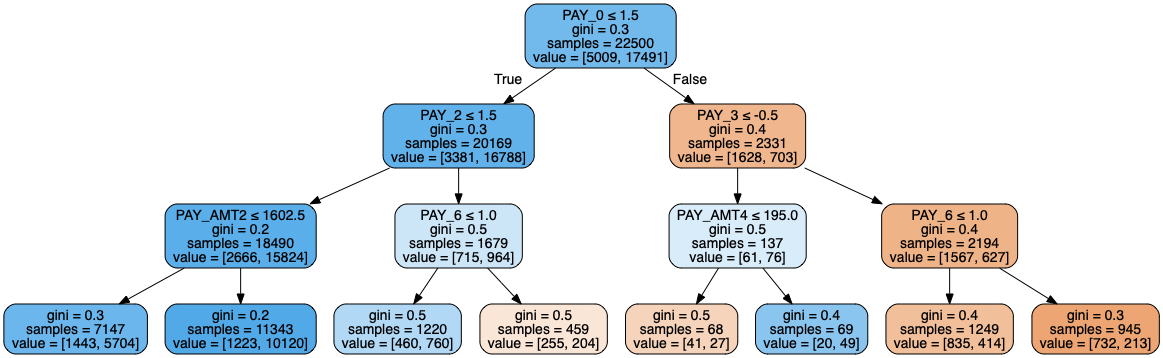

In [78]:
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X.columns, 
    label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [82]:
# CoVariance

covMat = credit_one_data_transformed.cov()
print(covMat)

                                 ID     LIMIT_BAL     MARRIAGE            AGE  \
ID                     7.500250e+07  2.941664e+07  -131.452515    1491.057019   
LIMIT_BAL              2.941664e+07  1.683446e+10 -7323.669658  173076.722569   
MARRIAGE              -1.314525e+02 -7.323670e+03     0.272452      -1.992764   
AGE                    1.491057e+03  1.730767e+05    -1.992764      84.969755   
PAY_0                 -2.975726e+02 -3.954593e+04     0.011683      -0.408639   
PAY_2                 -1.162770e+02 -4.603765e+04     0.015122      -0.553408   
PAY_3                 -1.916922e+02 -4.443225e+04     0.020421      -0.585263   
PAY_4                 -2.769132e+01 -4.057181e+04     0.020213      -0.535851   
PAY_5                 -2.178600e+02 -3.667056e+04     0.021074      -0.562245   
PAY_6                 -2.018774e+02 -3.509308e+04     0.020616      -0.517022   
BILL_AMT1              1.236447e+07  2.727020e+09  -902.154685   38172.933546   
BILL_AMT2              1.108

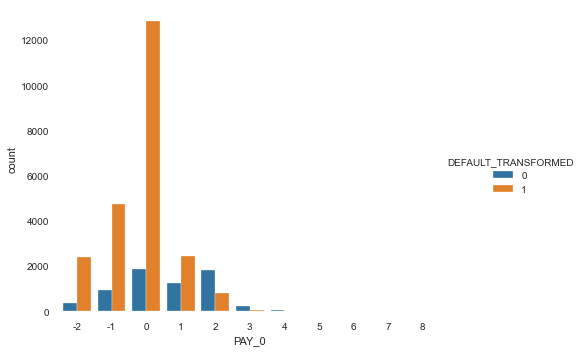

In [92]:
# factorplot of customers splitted into sex, education, and customers split into either defaulted or not
sns.factorplot('PAY_0', data=credit_one_data_transformed, kind='count', hue='DEFAULT_TRANSFORMED', aspect=1.25, size=5)